In [2]:
import numpy as np
from simulator import NBodySimulator
import matplotlib.pyplot as plt
from plot_fun import plot_3d, plot_3d_animate
from simulator import generate_data
from pymongo import MongoClient

%load_ext autoreload
%autoreload 2
%matplotlib inline

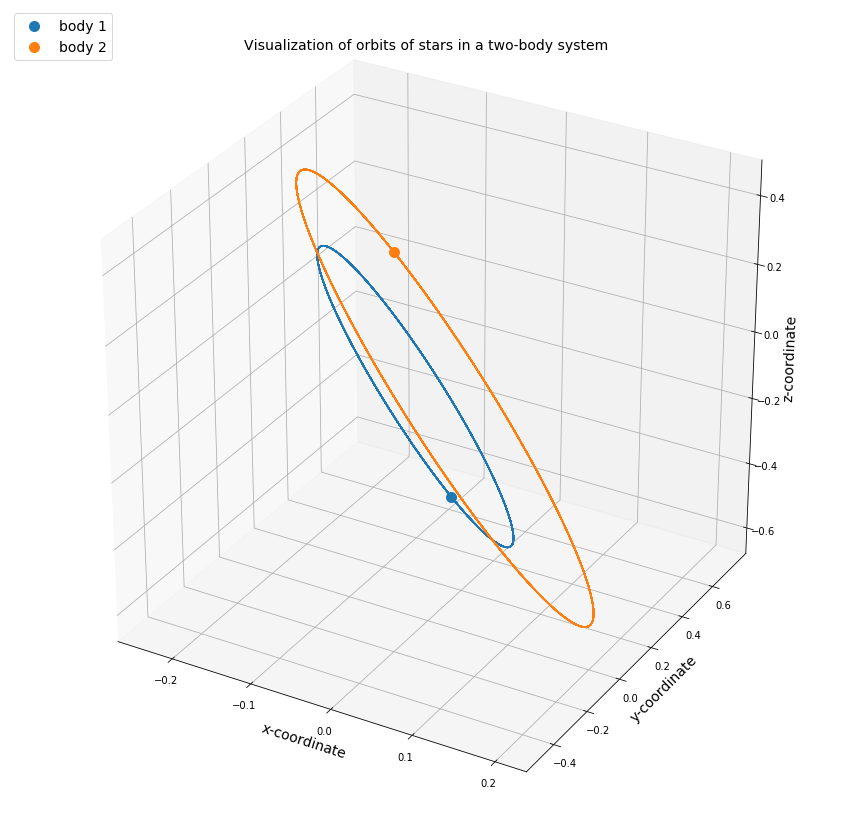

In [249]:
sim2 = NBodySimulator(n=2)

m = np.random.random((2,1))*5
r = np.random.random((2,3))*2-1
v = np.random.random((2,3))*2-1

sim2.fit(r, v, m)

t = np.linspace(0, 30, 5000)

sim2.simulate(t)

plot_3d(sim2.r_sol_com)

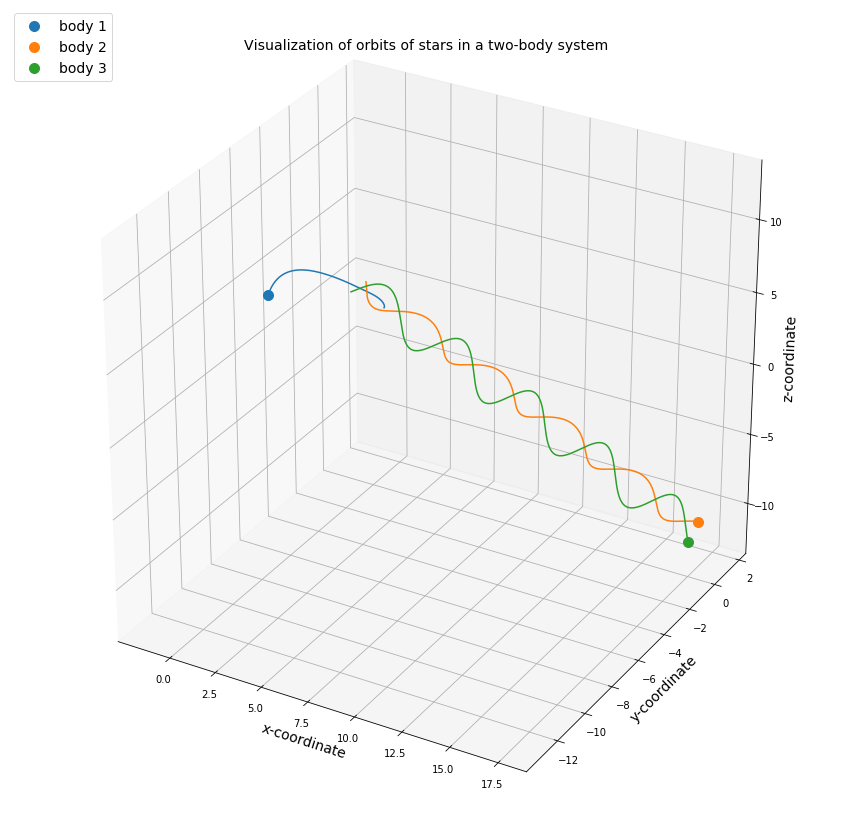

In [250]:
sim2 = NBodySimulator(n=3)

# m = np.array([1, 1, 1])
m = np.random.random((3,1))*5
r = np.random.random((3,3))*2-1
v = np.random.random((3,3))*2-1

sim2.fit(r, v, m)

t = np.linspace(0, 30, 5000)

sim2.simulate(t)

plot_3d(sim2.r_sol)

In [252]:
sol = generate_data(2)

Generated simulation       1 /       2 for sample 
Generated simulation       2 /       2 for sample 


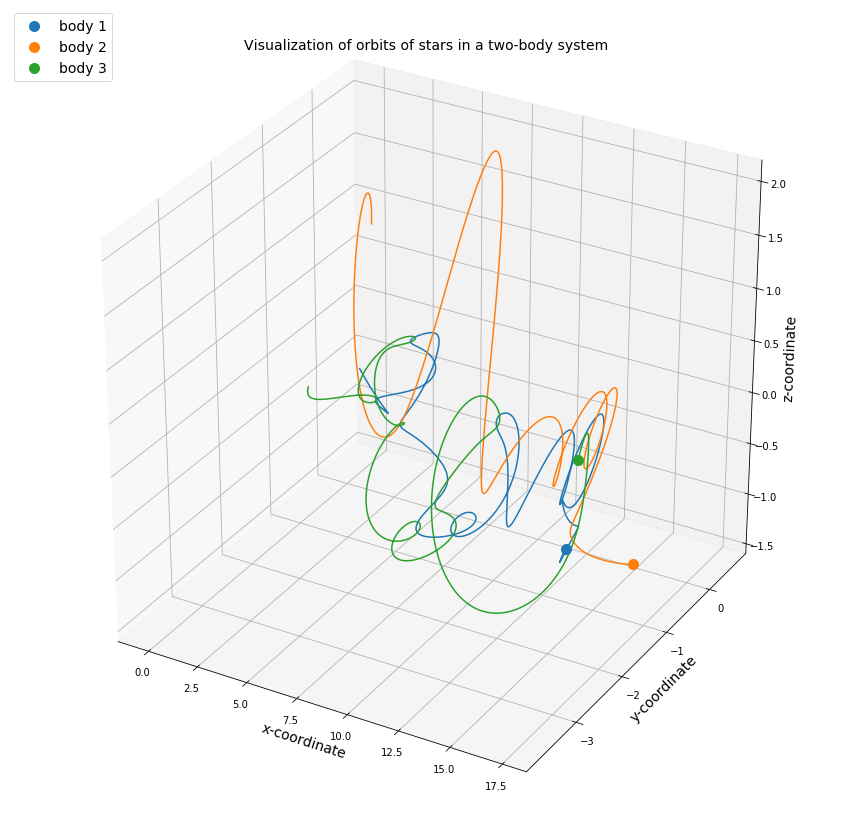

In [253]:
plot_3d(sol[0][:,0:9])

/Users/edwinressegue/opt/miniconda3/envs/gal/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)

In [13]:
client = MongoClient('localhost', 27017)
db = client['n-body']
collection = db['test_data']
collection.drop()

generate_data(10, collection=collection)

Generated simulation       1 /      10 for sample test_data
Generated simulation       2 /      10 for sample test_data
Generated simulation       3 /      10 for sample test_data
Generated simulation       4 /      10 for sample test_data
Generated simulation       5 /      10 for sample test_data
Generated simulation       6 /      10 for sample test_data
Generated simulation       7 /      10 for sample test_data
Generated simulation       8 /      10 for sample test_data
Generated simulation       9 /      10 for sample test_data
Generated simulation      10 /      10 for sample test_data


[]

10 3


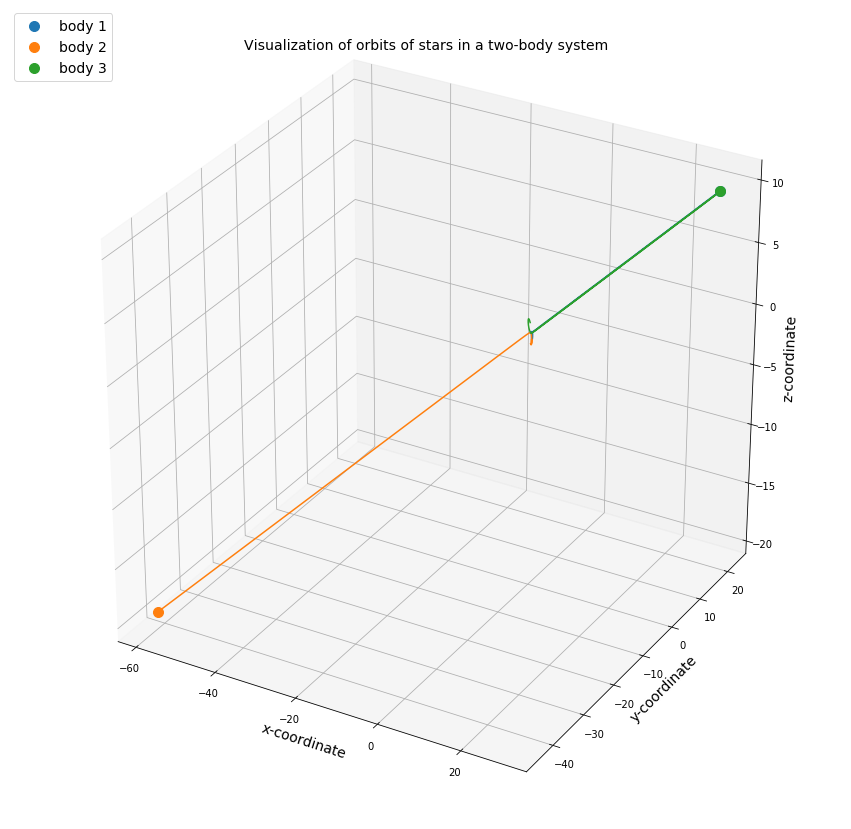

In [19]:
count = collection.estimated_document_count()
idx = np.random.choice(count)
print(count, idx)
data = np.array((collection.find_one({'id':idx}))['r_sol_com'])

plot_3d(data)

In [21]:
(collection.find_one({'id':3}))['message']

'Integration successful.'